In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [7]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')


saved the dataset in a variable called data

In [4]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
features=['Series_Title','Genre','IMDB_Rating','Director']

In [10]:
filtered_data=data[features]
filtered_data.head()

,Series_Title,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,Drama,9.3,Frank Darabont
1,The Godfather,"Crime, Drama",9.2,Francis Ford Coppola
2,The Dark Knight,"Action, Crime, Drama",9.0,Christopher Nolan
3,The Godfather: Part II,"Crime, Drama",9.0,Francis Ford Coppola
4,12 Angry Men,"Crime, Drama",9.0,Sidney Lumet


In [11]:
filtered_data.isna().sum()

Series_Title    0
Genre           0
IMDB_Rating     0
Director        0
dtype: int64

we have no missing values 

In [28]:
genre_data= filtered_data['Genre'].value_counts().reset_index()
genre_data.columns = ['Genre', 'Count']
genre_data.head()

,Genre,Count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30


as shown the most popular genre is drama 

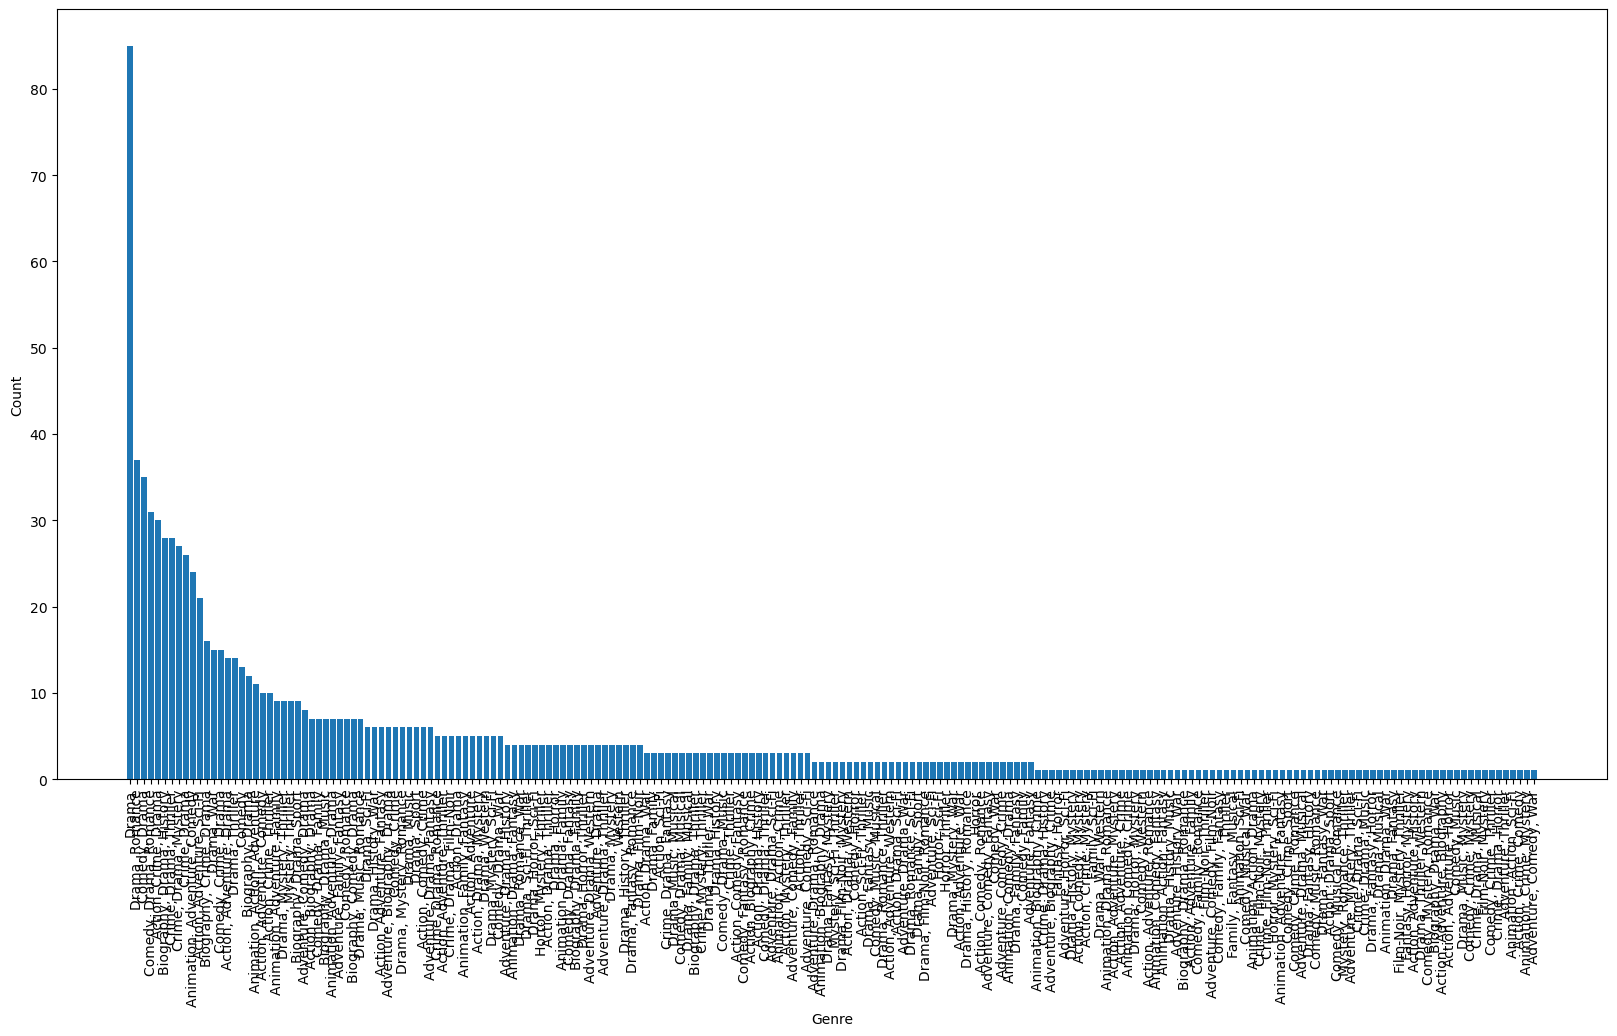

In [33]:
plt.figure(figsize=(20, 10))  
plt.bar(genre_data['Genre'], genre_data['Count'])  
plt.xlabel('Genre')  
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.show()

In [34]:
director_data = data['Director'].value_counts().reset_index()
director_data.columns = ['Director', 'Count']
director_data.head()

,Director,Count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10


as shown Alfred Hitchcock has directed 14 top rated movie or series 

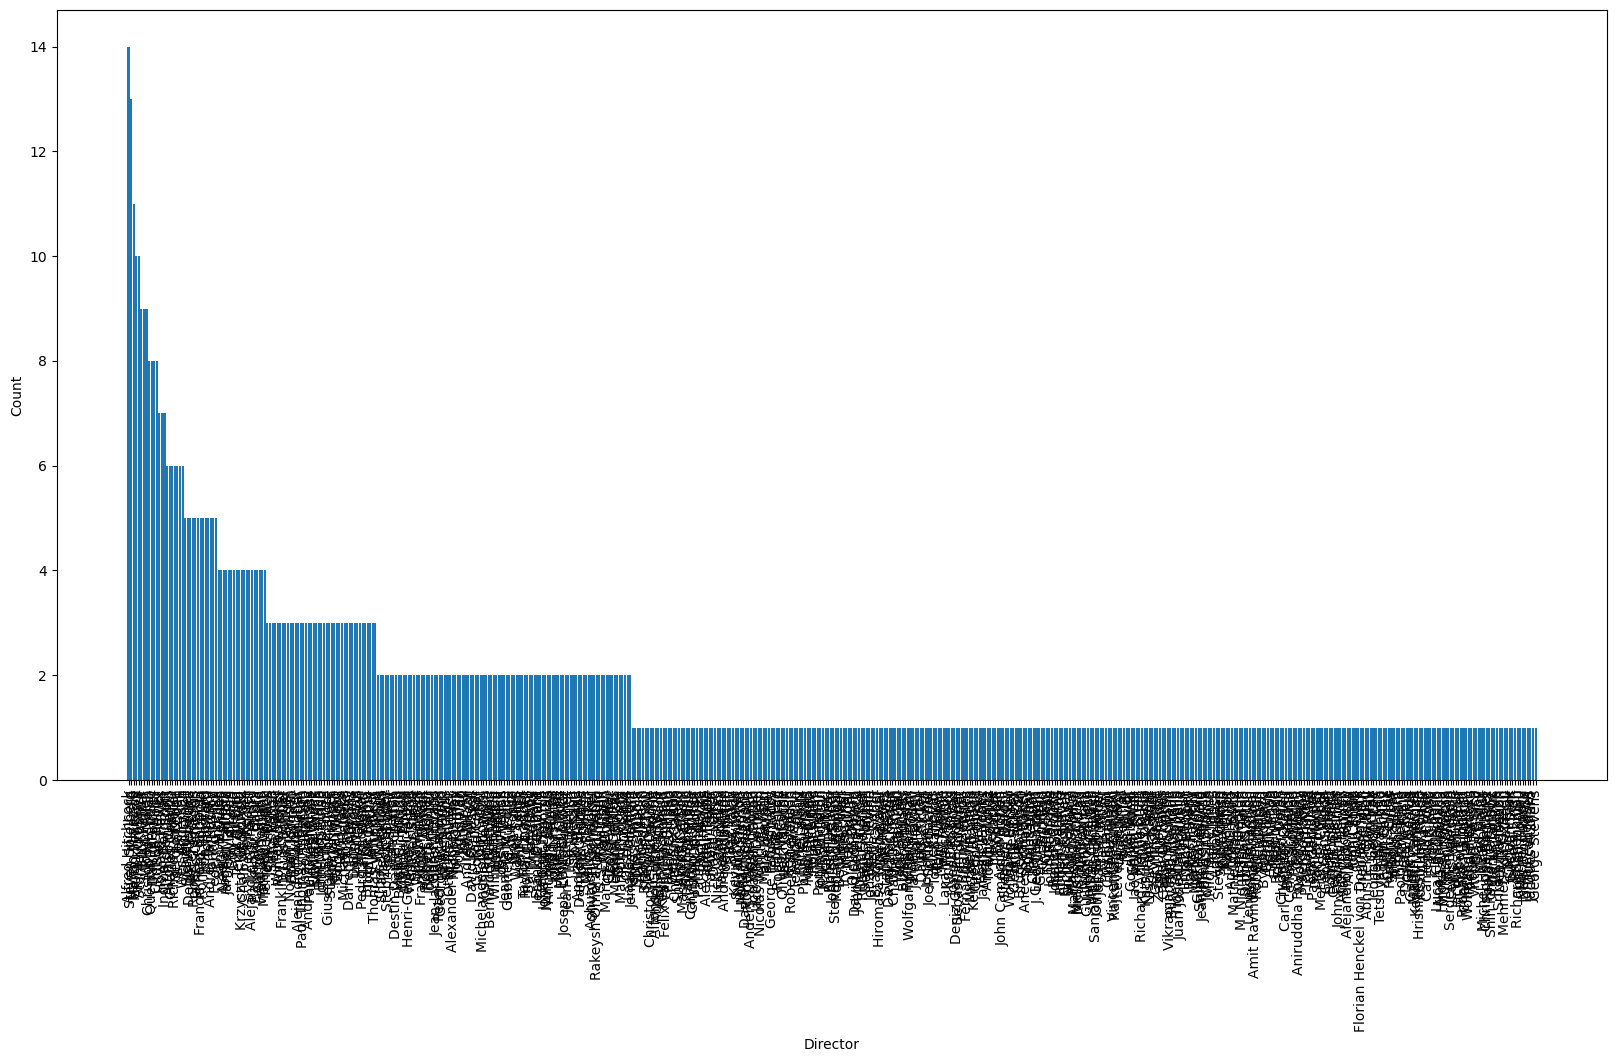

In [35]:
plt.figure(figsize=(20, 10))
plt.bar(director_data['Director'], director_data['Count'])
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()